# Creating OMICS-based Mevalonate Biofuel COBRA  Models

Adapted from "Stage_three_GEM notebook" by Brunck [1]

### Load the appropriate Python packages

In [1]:
import cobra.test
from cobrapy_bigg_client import client

# Panda python module for dataframe and data storage/manipulation
import pandas as pd
pd.set_option('mode.use_inf_as_na',True)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 999)
pd.set_option('precision', 3)

from contextlib import contextmanager
import sys, os
 
@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

## Load the "iJO1366 Mevalonate Pathways" model

In [2]:
model_orig = cobra.io.load_json_model("iJO1366_mevalonate_pathways.json");
model_orig.solver = 'glpk'
model = model_orig.copy();

Set parameter Username
Academic license - for non-commercial use only - expires 2022-10-10


In [3]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.005113,0,0.00%
cl_e,EX_cl_e,0.005113,0,0.00%
cobalt2_e,EX_cobalt2_e,2.456E-05,0,0.00%
cu2_e,EX_cu2_e,0.0006965,0,0.00%
fe2_e,EX_fe2_e,0.01578,0,0.00%
glc__D_e,EX_glc__D_e,10,6,100.00%
k_e,EX_k_e,0.1918,0,0.00%
mg2_e,EX_mg2_e,0.008522,0,0.00%
mn2_e,EX_mn2_e,0.0006788,0,0.00%
mobd_e,EX_mobd_e,0.0001267,0,0.00%


Note that none of the biofuels are produced in the default model!

## Load the OMICs general information on metabolites and reactions

In [4]:
# Adapted from "Stage_three_GEM notebook" by Brunck [1]

# make a mapping to header entries correspoding to keys of SteadyState_Dict to M reactIDs

rxn_name_map = {'Pyruvate': 'EX_pyr_e', 'biomass': 'Ec_biomass_iJO1366_core_53p95M','Acetyl-CoA':'EX_accoa_e', 'Glucose':'EX_glc_e', 'Mev-P':'EX_5pmev_e', 'GGPP':'EX_GGDP_e', 'Succinate':'EX_succ_e', 'HMG-coA':'EX_hmgcoa_e', 'hmbdp':'EX_h2mb4p_e', 'IPP/DMAPP':'IPP/DMAPP', 'Ethanol':'EX_etoh_e', 'Formate':'EX_for_e', 'Mevalonate':'EX_mev_e', 'Isopentenol':'EX_ipoh_e', 'IP':'EX_ip_e', 'dxyl5p':'EX_dxyl5p_e', 'FPP':'EX_frdp_e', 'Lactate':'EX_lac__D_e', 'GPP':'EX_grdp_e', '2mecdp':'EX_2mecdp_e', '4c2me':'EX_4c2me_e', 'Acetate':'EX_ac_e'}

##########################################################################################

# load in CSV files with info corresponding to new metabolites:
met_data = pd.read_csv('./model_files/metabolites.csv')
# load in CSV files with info corresponding to new reactions:
rxn_data = pd.read_csv('./model_files/reactions.csv')
# load in CSV files with info corresponding to new reactions bounds, reversibility, subsystems:
info_data = pd.read_csv('./model_files/info_reactions.csv')

##########################################################################################

# tell pandas to not fill in empty cells with "nan" - just leave them empty
rxn_data = rxn_data.fillna('')
info_data = info_data.fillna('')

new_metabolites={}
new_reactions={}
bounds={}
subsystems={}

# makes a dictionary of formulas, names corresponding to keys of *NEW* metabolite abbreviations
for i in range(0,len(met_data.iloc[:,0])):
    met = met_data.iloc[i,0]
    new_metabolites[met]={}
    new_metabolites[met]['formula']= met_data.iloc[i,1]
    new_metabolites[met]['name']= met_data.iloc[i,2]

met = list(rxn_data.columns.values)  # list of all metabolites involved in new pathway
reactions=[]    # list of all new reactions 
for i in range(0,len(rxn_data.iloc[:,0])):
    reactions.append(str(rxn_data.iloc[i,0]))

# makes a dictionary of stoichiometries corresponding to reactions
for i in range(0,len(reactions)):
    new_reactions[reactions[i]]={}    
    for j in range(1,len(met)):
        stoich = rxn_data.iloc[i,j]
        if stoich != '':
            #print reactions[i], met[j], rxn_data.ix[i,j]#, type(stoich)
            new_reactions[reactions[i]][met[j]]= rxn_data.iloc[i,j]   

# makes a dictionary of (1) bounds (2) subsystems corresponding to reactions
for i in range(0,len(rxn_data.iloc[:,0])):
    subsystems[reactions[i]] = info_data.iloc[i,6]
    bounds[reactions[i]]={}
    bounds[reactions[i]]= float(info_data.iloc[i,9]), float(info_data.iloc[i,10])
    
#print(bounds, subsystems)

mylegend = ['I1','I2','I3','L1','L2','L3','B1','B2', 'DH1']

In [5]:
met_data

,Unnamed: 0,formula,name
0,hmgcoa_c,C27H39N7O20P3S,3-Hydroxy-3-methyl-glutaryl-CoA
1,mev_R_c,C6H11O4,Mevalonate
2,5pmev_c,C6H10O7P,Mevalonate-5P
3,5dpmev_c,C6H10O10P2,Mevalonate-5PP
4,ipoh_c,C5H10O,Isopentenol
5,ip_c,C5H9O4P,Isopentenol-P
6,lim_c,C10H16,Limonene
7,bis_c,C15H24,Bisabolene
8,ggdp_c,C20H33O7P2,GeranylGeranyl-PP
9,ipoh_e,C5H10O,Isopentenol


In [6]:
rxn_data

,Unnamed: 0,hmgcoa_c,mev_R_c,5pmev_c,5dpmev_c,ipoh_c,ip_c,lim_c,bis_c,aacoa_c,accoa_c,ipdp_c,grdp_c,ggdp_c,frdp_c,h_c,coa_c,nadp_c,nadph_c,adp_c,atp_c,pi_c,ppi_c,co2_c,h2o_c,dmpp_c,2mecdp_c,dxyl5p_c,h2mb4p_c,4c2me_c,ipoh_e,ipdp_e,dmpp_e,mev_R_e,5pmev_e,5dpmev_e,ip_e,2mecdp_e,dxyl5p_e,h2mb4p_e,grdp_e,frdp_e,ggdp_e,4c2me_e,bis_e,lim_e,coa_e,accoa_e,aacoa_e,hmgcoa_e,amp_e,adp_e,atp_e,nad_e,nadh_e,nadp_e,nadph_e,amp_c,nad_c,nadh_c
0,HMGS,-1.0,,,,,,,,1.0,1.0,,,,,-1.0,-1.0,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,HMGR,1.0,-1.0,,,,,,,,,,,,,2.0,-1.0,-2.0,2.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,ERG1,,-1.0,1.0,,,,,,,,,,,,1.0,,,,1.0,-1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,ERG8,,,-1.0,1.0,,,,,,,,,,,,,,,1.0,-1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,MVD1,,,,-1.0,,,,,,,1.0,,,,,,,,1.0,-1.0,1.0,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,NudB,,,,,,1.0,,,,,-1.0,,,,1.0,,,,,,1.0,,,-1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,UNK,,,,,1.0,-1.0,,,,,,,,,,,,,,,1.0,,,-1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,LIMS,,,,,,,1.0,,,,,-1.0,,,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,BISS,,,,,,,,1.0,,,,,,-1.0,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9,YPL069C,,,,,,,,,,,-1.0,,1.0,-1.0,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [7]:
info_data

,Reaction Abbreviation,Reaction Name,Formula,Gene-Protein-Reaction Association,Gene-Reaction Association,Protein-Reaction Association,Subsystem,EC Number,Reversible,Lower Bound,Upper Bound,Objective (c)
0,HMGS,hydroxymethylglutaryl-CoA synthase,coa[c] + h[c] + hmgcoa[c] <==> aacoa[c] + acco...,,,,isoprenoid biosynthesis,2.3.3.10,1,-1000,1000,0
1,HMGR,hydroxymethylglutaryl-CoA reductase,coa[c] + mev_R[c] + 2 nadp[c] <==> 2 h[c] + hm...,,,,isoprenoid biosynthesis,1.1.1.34,1,-1000,1000,0
2,ERG1,mevalonate kinase,atp[c] + mev_R[c] --> 5pmev[c] + adp[c] + h[c],,,,isoprenoid biosynthesis,2.7.1.36,0,0,1000,0
3,ERG8,phosphomevalonate kinase,5pmev[c] + atp[c] --> 5dpmev[c] + adp[c],,,,isoprenoid biosynthesis,2.7.4.2,0,0,1000,0
4,MVD1,diphosphomevalonate decarboxylase,5dpmev[c] + atp[c] --> adp[c] + co2[c] + ipdp[...,,,,isoprenoid biosynthesis,4.1.1.33,0,0,1000,0
5,NudB,dATP pyrophosphohydrolase,ipdp[c] + h2o[c] --> ip[c] + pi[c] + h[c],,,,isoprenoid biosynthesis,3.6.1.-,0,0,1000,0
6,UNK,inorganic or acidic phosphatase acting on IP,ip[c] +h20[c] --> ipoh[c] + pi[c] +h[c],,,,Purine metabolism,3.6.5.1/3.6.5.2/3.6.5.3/3.6.5.4/3.6.5.5/3.6.5.6,0,0,1000,0
7,LIMS,limonene synthase,grdp[c] --> lim[c] + ppi[c],,,,isoprenoid biosynthesis,4.2.3.16,0,0,1000,0
8,BISS,bisabolene synthase,frdp[c] --> bis[c] + ppi[c],,,,isoprenoid biosynthesis,4.2.3.-,0,0,1000,0
9,YPL069C,geranylgeranyl diphosphate synthase,frdp[c] + ipdp[c] --> ggdp[c] + ppi[c],,,,isoprenoid biosynthesis,2.5.1.1,0,0,1000,0


## Load the OMICs data

In [8]:
# Adapted from "Stage_three_GEM notebook" by Brunck [1]

# All this data in these files needs to have the column entitled "lim_c" changed to "lim_e"

# isopentenol producing strains
I1_data = pd.read_csv('./data/I1.csv',index_col=0)
I2_data = pd.read_csv('./data/I2.csv',index_col=0)
I3_data = pd.read_csv('./data/I3.csv',index_col=0)

# limonene producing strains
L1_data = pd.read_csv('./data/L1.csv',index_col=0)
L2_data = pd.read_csv('./data/L2.csv',index_col=0)
L3_data = pd.read_csv('./data/L3.csv',index_col=0)

# bisabolene producing strains
B1_data = pd.read_csv('./data/B1.csv',index_col=0)
B2_data = pd.read_csv('./data/B2.csv',index_col=0)

# wild-type strain
DH1_data = pd.read_csv('./data/DH1.csv',index_col=0)

# Dictionary of all strain data
met_data ={'I1':I1_data, 'I2':I2_data, 'I3':I3_data, 'L1':L1_data, 'L2':L2_data, 'L3':L3_data, 'B1':B1_data, 'B2':B2_data, 'DH1':DH1_data}

# Pandas dataframe of all strain data
DF_metabolite_conc_all = pd.DataFrame()
for strain in met_data.keys():
    DF_metabolite_conc_all = pd.concat([DF_metabolite_conc_all, met_data[strain]])

# Organize the pandas dataframe - drop columns not used in analysis

DF_metabolite_conc_all = DF_metabolite_conc_all.drop(['Cystine','Intracellular volume / sample','OD600','Sample','fold_production'],axis = 1)
#print("list of strains in pandas metabolite dataframe:", DF_metabolite_conc_all.sort(column='Strain',ascending=True).Strain.unique().tolist())
DF_metabolite_conc_all[0:14]

,Hour,Strain,glc__D_e,pyr_e,succ_e,lac__D_e,for_e,ac_e,ipoh_e,bis_e,lim_e,aacoa_c,hmgcoa_c,mev_R_c,5pmev_c,ipdp_c,ip_c,grdp_c,frdp_c,amp_c,adp_c,atp_c,nad_c,nadp_c,accoa_c,fdp_c,3pg_c,pep_c,pyr_c,lac__D_c,fum_c,succ_c,oxalcoa_c,mal__L_c,akg_c,acon__C_c,cit_c,icit_c,glx_c,glyclt_c,dxyl5p_c,2me4p,h2mb4p_c,2mecdp_c,4c2me_c,gly_c,ala__L_c,ser__L_c,pro__L_c,val__L_c,thr__L_c,cys__L_c,leu__L_c,ile__L_c,asn__L_c,asp__L_c,gln__L_c,lys__L_c,glu__L_c,met__L_c,his__L_c,phe__L_c,arg__L_c,tyr__L_c,trp__L_c,ex_con.id,ip_e,2mecdp_e,mev_R_e,dxyl5p_e,5pmev_e,h2mb4p_e,grdp_e,frdp_e,ggdp_e,4c2me_e,coa_e,accoa_e,aacoa_e,hmgcoa_e,amp_e,adp_e,atp_e,nad_e,nadh_e,nadp_e,nadph_e
0,0,I1,58.764,0.560,0.097,0.582,1.406,7.697,0.000,0.0,0.0,0,0.000e+00,3.480e-06,1.650e-05,0.003,0.000e+00,0.000e+00,0.0,1.714e-04,7.170e-05,2.214e-04,4.793e-04,6.080e-05,1.969e-04,0.005,0.001,2.380e-05,2.564e-03,0.014,4.481e-04,2.844e-03,0,3.374e-04,3.900e-05,1.710e-05,5.150e-05,1.100e-06,2.703e-04,3.690e-05,5.710e-05,0,0,3.925e-04,2.930e-05,2.906e-03,0.001,1.365e-02,1.991e-03,9.097e-04,9.989e-04,0,0.001,1.101e-03,5.063e-03,0.0,7.755e-04,6.917e-04,0.012,2.882e-04,6.442e-04,0.003,0.003,1.517e-03,3.734e-04,9.640e-05,9.263e-04,0.000e+00,0.000,0.0,0.000e+00,0.034,0.000e+00,0.0,0.000,0.000e+00,2.085e-04,0.000e+00,0,0.000,0.000e+00,0,0,0.0,0,0.0,0
1,2,I1,52.737,0.058,1.987,4.418,5.487,15.661,0.000,0.0,0.0,0,0.000e+00,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0,0,0.000e+00,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0,0.000,0.000e+00,0.000e+00,0.0,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.0,0.000e+00,0.000,0.000e+00,0.0,0.000,0.000e+00,0.000e+00,0.000e+00,0,0.000,0.000e+00,0,0,0.0,0,0.0,0
2,4,I1,48.139,0.045,1.906,6.749,2.060,18.430,0.692,0.0,0.0,0,6.890e-05,2.753e-04,9.387e-04,0.018,3.969e-03,0.000e+00,0.0,3.153e-04,1.891e-04,3.791e-04,1.829e-03,2.212e-04,4.923e-04,0.005,0.002,5.040e-05,1.671e-04,0.124,5.649e-04,5.859e-03,0,4.579e-04,2.810e-05,6.220e-05,7.630e-05,4.670e-06,4.232e-04,1.011e-04,1.590e-04,0,0,9.146e-04,1.900e-05,3.544e-03,0.002,1.958e-04,7.942e-03,8.314e-04,8.190e-05,0,0.002,6.488e-04,4.955e-04,0.0,3.902e-04,8.716e-04,0.010,1.211e-04,9.417e-04,0.004,0.006,1.426e-03,3.711e-04,4.779e-03,3.391e-02,2.398e-04,0.008,0.0,0.000e+00,0.000,0.000e+00,0.0,0.001,9.361e-04,0.000e+00,2.136e-04,0,0.002,0.000e+00,0,0,0.0,0,0.0,0
3,6,I1,44.761,0.111,1.936,9.657,2.775,20.056,0.000,0.0,0.0,0,0.000e+00,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0,0,0.000e+00,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0,0.000,0.000e+00,0.000e+00,0.0,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,4.650e-03,4.859e-02,6.099e-04,0.012,0.0,0.000e+00,0.000,9.151e-04,0.0,0.010,1.396e-03,0.000e+00,0.000e+00,0,0.000,0.000e+00,0,0,0.0,0,0.0,0
4,8,I1,40.254,0.719,1.994,13.328,2.925,21.697,1.275,0.0,0.0,0,0.000e+00,5.951e-04,1.216e-03,0.017,3.298e-03,0.000e+00,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.004,0.002,4.380e-05,1.946e-03,0.213,5.233e-04,5.969e-03,0,4.227e-04,1.520e-05,8.630e-05,7.520e-05,3.520e-06,3.312e-04,9.500e-05,1.411e-04,0,0,7.889e-04,2.560e-05,0.000e+00,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0,0.000,0.000e+00,0.000e+00,0.0,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,4.413e-03,2.682e-02,0.000e+00,0.022,0.0,3.952e-04,0.000,2.255e-03,0.0,0.005,2.627e-03,0.000e+00,0.000e+00,0,0.000,0.000e+00,0,0,0.0,0,0.0,0
5,10,I1,37.703,0.874,1.987,14.226,3.534,23.414,0.000,0.0,0.0,0,0.000e+00,0.000e+00

## List the cytoplasmic and extracellular metabolites that are monitored

In [9]:
df_mets = DF_metabolite_conc_all.copy()

# Adjust external data metabolite names to existing model names
df_mets.rename(columns = {'2me4p':'2me4p_c'},inplace=True)
df_mets.rename(columns = {'acon__C_c':'acon_C_c'},inplace=True)
df_mets.rename(columns = {'mev_R_c':'mev__R_c'},inplace=True)
df_mets.rename(columns = {'mev_R_e':'mev__R_e'},inplace=True)

# Remove metabolite names that are not supported by the model (Most are all zeros)
df_mets.drop('aacoa_e',axis=1,inplace=True)
df_mets.drop('accoa_e',axis=1,inplace=True)
df_mets.drop('adp_e',axis=1,inplace=True)
df_mets.drop('atp_e',axis=1,inplace=True)
df_mets.drop('nad_e',axis=1,inplace=True)
df_mets.drop('nadh_e',axis=1,inplace=True)
df_mets.drop('nadp_e',axis=1,inplace=True)
df_mets.drop('nadph_e',axis=1,inplace=True)
df_mets.drop('coa_e',axis=1,inplace=True)
df_mets.drop('ex_con.id',axis=1,inplace=True)
df_mets.drop('hmgcoa_e',axis=1,inplace=True)

# Create extracellular and cytoplasmic metabolite lists
mets_tracked = list(df_mets.columns)
del mets_tracked[0:2] # Removing Hour and Strain elements in the list
mets_tracked.sort() 

met_c = []
met_e = []
met_names_c = []
met_names_e = []
for met in mets_tracked:
    if "_e" in met:
        met_e.append(met)
        met_names_e.append(model.metabolites.get_by_id(met).name)
    if "_c" in met:
        met_c.append(met)
        met_names_c.append(model.metabolites.get_by_id(met).name)    

### Table showing the extracellular metabolites that are monitored

In [10]:
exo_mets = pd.DataFrame(met_e,columns=['Extracellular Metabolite IDs'])
exo_mets['Extracellular Metabolite Names'] = met_names_e
exo_mets

,Extracellular Metabolite IDs,Extracellular Metabolite Names
0,2mecdp_e,"2-C-Methyl-D-erythritol 2,4-cyclodiphosphate"
1,4c2me_e,4-(Cytidine 5-diphospho)-2-C-methyl-D-erythritol
2,5pmev_e,Mevalonate-5P
3,ac_e,Acetate
4,amp_e,AMP C10H12N5O7P
5,bis_e,Bisabolene
6,dxyl5p_e,1-Deoxy-D-xylulose 5-Phosphate
7,for_e,Formate
8,frdp_e,Farnesyl-PP
9,ggdp_e,GeranylGeranyl-PP


### Table showing the cytoplasmic metabolites that are monitored

In [11]:
cyto_mets = pd.DataFrame(met_c,columns=['Cytoplasm Metabolite ID'])
cyto_mets['Cytoplasm Metabolite Names'] = met_names_c
cyto_mets

,Cytoplasm Metabolite ID,Cytoplasm Metabolite Names
0,2me4p_c,2-C-methyl-D-erythritol 4-phosphate
1,2mecdp_c,"2-C-methyl-D-erythritol 2,4-cyclodiphosphate"
2,3pg_c,3-Phospho-D-glycerate
3,4c2me_c,4-(cytidine 5'-diphospho)-2-C-methyl-D-erythritol
4,5pmev_c,R 5 Phosphomevalonate C6H10O7P
5,aacoa_c,Acetoacetyl-CoA
6,accoa_c,Acetyl-CoA
7,acon_C_c,Cis-Aconitate
8,adp_c,ADP C10H12N5O10P2
9,akg_c,2-Oxoglutarate


## Setting aerobic conditions for the model

In [12]:
# Adapted from "Stage_three_GEM notebook" by Brunck [1]

def adjust_model_reactions(m, o_cond):
    #1. constrain the model to use 'PFK' instead of 'F6PA', 'DHAPT' when growing on glucose
    noFlux = ['F6PA', 'DHAPT'];
    for rxn in noFlux:
        m.reactions.get_by_id(rxn).lower_bound = 0.0
        m.reactions.get_by_id(rxn).upper_bound = 0.0
    
    #2. constrain the model to use the physiologically perferred glutamate synthesis enzymes (PMCID: 196288)
    m.reactions.GLUDy.upper_bound = 0
    m.reactions.GLUDy.lower_bound = 0

    #3. depending on oxygen availability, constrain the model to use the correct RNR enzymes (DOI:10.1111/j.1365-2958.2006.05493.x)
    # Dihydroorotate dehydrogenase (PyrD) (DOI:10.1016/S0076-6879(78)51010-0, PMID: 199252, DOI:S0969212602008316 [pii])
    aerobic = ['RNDR1', 'RNDR2', 'RNDR3', 'RNDR4', 'DHORD2', 'ASPO6','LCARR'] # see DOI:10.1111/j.1365-2958.2011.07593.x; see DOI:10.1089/ars.2006.8.773 for a review
    anaerobic = ['RNTR1c2', 'RNTR2c2', 'RNTR3c2', 'RNTR4c2', 'DHORD5', 'ASPO5'] # see DOI:10.1074/jbc.274.44.31291, DOI:10.1128/JB.00440-07
    if o_cond == 'aerobic':
        rxnList = aerobic
    else:
        rxnList = anaerobic
    for rxn in rxnList:
        m.reactions.get_by_id(rxn).lower_bound = 0.0
        m.reactions.get_by_id(rxn).upper_bound = 0.0


    #4. constrain fatty acid biosynthesis to use the physiologically preferred enzymes'''
    # Fatty acid biosynthesis: DOI: 10.1016/j.ymben.2010.10.007, PMCID: 372925
    fattyAcidSynthesis = ['ACCOAC', 'ACOATA', 'HACD1', 'HACD2', 'HACD3', 'HACD4', 'HACD5', 'HACD6', 'HACD7', 'HACD8', 'KAS14', 'KAS15', 'MACPD', 'MCOATA', '3OAR100', '3OAR120', '3OAR121', '3OAR140', '3OAR141', '3OAR160', '3OAR161', '3OAR180', '3OAR181', '3OAR40', '3OAR60', '3OAR80']
    fattyAcidOxidation = ['ACACT1r', 'ACACT2r', 'ACACT3r', 'ACACT4r', 'ACACT5r', 'ACACT6r', 'ACACT7r', 'ACACT8r', 'ACOAD1f', 'ACOAD2f', 'ACOAD3f', 'ACOAD4f', 'ACOAD5f', 'ACOAD6f', 'ACOAD7f', 'ACOAD8f', 'CTECOAI6', 'CTECOAI7', 'CTECOAI8', 'ECOAH1', 'ECOAH2', 'ECOAH3', 'ECOAH4', 'ECOAH5', 'ECOAH6', 'ECOAH7', 'ECOAH8']
    ndpk = ['NDPK1','NDPK2','NDPK3','NDPK4','NDPK5','NDPK7','NDPK8']
    rxnList = fattyAcidSynthesis + fattyAcidOxidation
    for rxn in rxnList:
        m.reactions.get_by_id(rxn).lower_bound = 0.0
        m.reactions.get_by_id(rxn).upper_bound = 1000.0
    
    #4. ATP maintenence
    m.reactions.get_by_id("ATPM").lower_bound = 0
    return m

### Calculate optimized growth rate for aerobic model

In [13]:
m = adjust_model_reactions(model,'aerobic')
solution = m.optimize(); # Changed from m.optimize(solver=gurobi)
print("solution:", solution.objective_value) # Growth-rate

solution: 0.9516149915266706


### Model summary before the key reaction bounds are changed to match the phenotyic data.

In [14]:
m_orig = m.copy();
m.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.004953,0,0.00%
cl_e,EX_cl_e,0.004953,0,0.00%
cobalt2_e,EX_cobalt2_e,2.379E-05,0,0.00%
cu2_e,EX_cu2_e,0.0006747,0,0.00%
fe2_e,EX_fe2_e,0.01528,0,0.00%
glc__D_e,EX_glc__D_e,10,6,100.00%
k_e,EX_k_e,0.1857,0,0.00%
mg2_e,EX_mg2_e,0.008255,0,0.00%
mn2_e,EX_mn2_e,0.0006576,0,0.00%
mobd_e,EX_mobd_e,0.0001228,0,0.00%


## Constrain exchange reactions with phenotypic measurements

This function will perform the following operations:
- choose the constraints based on the phenotypic data
- calculate the flux from the phenotypic data
- create a cobra model based on those constrains

#### Define the different model phases.
- I: 0 to 4 (0 to 6 hours)
- II: 4 to 10 (8 to 20 hours)
- III: 10 to 13 (24 to 72 hours)

In [15]:
# defined phases from metabolomics data
phase1=[0,2,4,6]
phase2=[8,10,12,16,18,20]
phase3=[24,36,48]
all_time_points = [0,2,4,6,8,10,12,16,18,20,24,36,48]

Below is a method that creates the following information for a given strain and phase.

1. A **flux dictionary (fluxDict)** that includes the estimated flux values for the exchange reactions that include OMICs information (I1_data, I2_data, ... DH1_data). It is composed of two dictionaries, one within the other. The keys for the outer dictionary are the hours of the production run (0, 2, 6, 8, 10, 12, 16, 18, 20, 24, 36, and 48). The internal dictionary uses the reaction IDs for the keys with each key associated with a flux.
2. Create a **strain/phase specific model** for a given strain (I1, I2, ... DH1) and phase type (phase1, phase2 and phase3).
3. The **expected average biomass** for a given strain and phase.
4. A table that lists the **average flux** for the exchange reaction and biomass for the given specific phase and strain.

In [16]:
# Adapted from "Stage_three_GEM notebook" by Brunck [1]

import math
import numpy as np
from numpy import log
import pytest

def set_fluxes_by_phase(df, phase_times, m, strain):
    read_to_struct = []
    constraints = []
    fluxDict={}

    # Do not constrain any cofactor secretions
    for i in df.columns:
        if "_e" in i and "nad" not in i and "amp" not in i and "adp" not in i and "atp" not in i and "coa" not in i:
            constraints.append(i)
    constraints.append('EX_lim_e')  
    
    print('exchange reactions constrained by phenotypic data:\n \n', constraints, '\n')  

    for i in df.index[:-1]:
        fluxDict[df.Hour[i]] ={}

        # Extrapolate for missing OD values:
        if df.OD600[i] == 0 and df.Hour[i] != 0:
            tmp = (df.OD600[i+1] - df.OD600[i-1])/2 + df.OD600[i-1]
            tmp2 = df.OD600[i+1]
        elif df.OD600[i+1] == 0:
            tmp = df.OD600[i]
            tmp2 = (df.OD600[i+2] - df.OD600[i])/2 + df.OD600[i]
 
        # Calculate to convert mM to mmol/gDW*hr
        gDWperLperOD600=0.65*tmp
        delta_t = df.Hour[i+1]-df.Hour[i]
        constant = (1/gDWperLperOD600)/(delta_t)
        fluxDict[df.Hour[i]]['biomass'] = abs((log(tmp2)- log(tmp))/(delta_t))
        
        # Calculated the estimated flux values from the metabolite concentrations
        for react in m.reactions: # Change react.startswidth to react.id.startswidth          
            x = list(m.reactions.get_by_id(str(react.id)).metabolites)
            metab = [r.id for r in x]
            if react.id.startswith('EX') and metab[0] in constraints:
                met_temp = metab[0]
                fluxDict[df.Hour[i]][str(react.id)] = (df[str(met_temp)][i+1] - df[str(met_temp)][i])*(constant)
               
    # Take the average of fluxes for each reaction within the phase
    for j in fluxDict[0].keys():   
        if len(phase_times) == 3:  #phase 3
            phase_tmp = '24 to 72'
            avg_flux = np.average([fluxDict[phase_times[0]][j], fluxDict[phase_times[1]][j], fluxDict[phase_times[2]][j]])
            #print(j, "Phase 3 - flux (mmol/gDW*hr):", avg_flux)
            read_to_struct.append({ 'reaction':j, 'avg_flux':avg_flux,'phase':phase_tmp, 'strain':strain})
        if len(phase_times) == 6:  #phase 2
            phase_tmp = '8 to 20'
            avg_flux = np.average([fluxDict[phase_times[0]][j], fluxDict[phase_times[1]][j], fluxDict[phase_times[2]][j],fluxDict[phase_times[3]][j],fluxDict[phase_times[4]][j],fluxDict[phase_times[5]][j]])
            #print(j, "Phase 2 - flux (mmol/gDW*hr):", avg_flux)
            read_to_struct.append({ 'reaction':j, 'avg_flux':avg_flux,'phase':phase_tmp, 'strain':strain})
        if len(phase_times) == 4:  #phase 1
            phase_tmp = '0 to 6'            
            avg_flux = np.average([fluxDict[phase_times[0]][j], fluxDict[phase_times[1]][j], fluxDict[phase_times[2]][j], fluxDict[phase_times[3]][j]])
            read_to_struct.append({ 'reaction':j, 'avg_flux':avg_flux,'phase':phase_tmp, 'strain':strain})
            #print(j, "Phase 1 - flux (mmol/gDW*hr):", avg_flux)
            #print('fluxDict[phase_times[0]][j] = ',fluxDict[phase_times[0]][j])
        if len(phase_times) > 6:
            avg_flux = 0
        
    # set the reaction bounds in m model to the average flux of the specified phase
        if j != 'biomass':
            m.reactions.get_by_id(str(j)).lower_bound = avg_flux
            if avg_flux < 0:
                m.reactions.get_by_id(str(j)).upper_bound = 0
            else:
                m.reactions.get_by_id(str(j)).upper_bound = avg_flux
        else:
            avg_biomass = avg_flux


    print('\n')        
    solution = m.optimize()
    print('Solution: \n',(solution.objective_value),'\n')
    print('Expected average biomass: \n',(avg_biomass))
    
    return (fluxDict, m, avg_biomass,pd.DataFrame(read_to_struct))

## Adapt a model to use phenotypic constraints to set exhange reaction bounds

This simulation uses the "set_fluxes_py_phase" method to create new mutant models for the phases of each strains. The operation of the method is shown below. This example will use phase 1 of strain I3. 

In [17]:
m = model.copy()
m = adjust_model_reactions(m, 'aerobic')

[I3_fluxdict_p1, m_I3_p1, I3_biomass_p1,I3data] = set_fluxes_by_phase(I3_data, phase1, m,'I3')

exchange reactions constrained by phenotypic data:
 
 ['glc__D_e', 'pyr_e', 'succ_e', 'lac__D_e', 'for_e', 'ac_e', 'ipoh_e', 'bis_e', 'lim_e', 'ip_e', '2mecdp_e', 'mev_R_e', 'dxyl5p_e', '5pmev_e', 'h2mb4p_e', 'grdp_e', 'frdp_e', 'ggdp_e', '4c2me_e', 'EX_lim_e'] 



Solution: 
 0.10863626307366572 

Expected average biomass: 
 0.10590467207177083


### Required input information to create the new phenotypic constrained models

#### Phenotypic data

The first variable is the phenotypic data for a given strain. In the above case the strain is "I3" and the phenotypic data is found in "I3_data".

In [18]:
I3_data

,Hour,Strain,Sample,OD600,Intracellular volume / sample,glc__D_e,pyr_e,succ_e,lac__D_e,for_e,ac_e,ipoh_e,bis_e,lim_e,aacoa_c,hmgcoa_c,mev_R_c,5pmev_c,ipdp_c,ip_c,grdp_c,frdp_c,amp_c,adp_c,atp_c,nad_c,nadp_c,accoa_c,fdp_c,3pg_c,pep_c,pyr_c,lac__D_c,fum_c,succ_c,oxalcoa_c,mal__L_c,akg_c,acon__C_c,cit_c,icit_c,glx_c,glyclt_c,dxyl5p_c,2me4p,h2mb4p_c,2mecdp_c,4c2me_c,gly_c,ala__L_c,ser__L_c,pro__L_c,val__L_c,thr__L_c,cys__L_c,leu__L_c,ile__L_c,asn__L_c,asp__L_c,gln__L_c,lys__L_c,glu__L_c,met__L_c,his__L_c,phe__L_c,arg__L_c,tyr__L_c,trp__L_c,Cystine,ex_con.id,ip_e,2mecdp_e,mev_R_e,dxyl5p_e,5pmev_e,h2mb4p_e,grdp_e,frdp_e,ggdp_e,4c2me_e,coa_e,accoa_e,aacoa_e,hmgcoa_e,amp_e,adp_e,atp_e,nad_e,nadh_e,nadp_e,nadph_e,fold_production
28,0,I3,3,1.473,7.360e-07,58.827,1.503,0.131,0.722,1.756,8.611,0.000,0,0,0,0.000e+00,1.440e-05,3.077e-04,3.380e-04,0.000,0.000e+00,0.000e+00,1.716e-04,5.680e-05,1.710e-04,5.250e-05,6.360e-05,1.514e-04,0.006,0.001,1.650e-05,3.009e-03,0.011,2.079e-04,0.003,0,1.450e-04,4.890e-05,2.250e-05,9.330e-05,1.480e-06,2.249e-04,4.320e-05,5.630e-05,0,0,1.001e-04,5.430e-05,2.200e-03,7.889e-04,0.004,1.394e-03,6.658e-04,8.590e-04,0,0.001,7.248e-04,4.345e-03,0,3.454e-04,2.813e-04,0.005,2.168e-04,1.090e-04,0.002,0.002,9.451e-04,2.328e-04,0,0.000e+00,0.000,0.000,4.600e-04,0,0.000e+00,0,0.000,0.000e+00,0.012,6.576e-04,1.383e-04,0.000e+00,0,0.002,0,0,0,0,0,0,0,12
29,2,I3,12,0.000,0.000e+00,52.747,0.044,2.032,1.016,3.252,15.022,0.000,0,0,0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000,0.000e+00,0.000,0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0,0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000e+00,0,0.000,0.000e+00,0.000e+00,0,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0,0.000e+00,0.000,0.000,0.000e+00,0,0.000e+00,0,0.000,0.000e+00,0.000,0.000e+00,0.000e+00,0.000e+00,0,0.000,0,0,0,0,0,0,0,12
30,4,I3,21,2.731,6.830e-07,47.257,0.043,1.977,1.272,3.239,18.080,0.895,0,0,0,7.680e-06,1.105e-03,6.236e-04,1.155e-02,0.007,0.000e+00,0.000e+00,3.175e-04,1.403e-04,3.432e-04,1.778e-03,2.099e-04,2.795e-04,0.004,0.002,4.250e-05,4.124e-04,0.030,3.446e-04,0.006,0,2.277e-04,3.130e-05,8.380e-05,9.480e-05,3.870e-06,3.256e-04,7.390e-05,3.402e-04,0,0,3.080e-04,4.510e-05,2.049e-03,1.004e-03,0.000,5.947e-04,6.990e-04,6.950e-05,0,0.002,3.710e-04,4.799e-04,0,2.898e-04,9.406e-04,0.013,0.000e+00,5.732e-04,0.003,0.005,8.037e-04,3.103e-04,0,2.901e-03,0.130,0.004,2.850e-02,0,4.652e-04,0,0.005,0.000e+00,0.013,1.399e-03,0.000e+00,0.000e+00,0,0.002,0,0,0,0,0,0,0,12
31,6,I3,30,0.000,0.000e+00,43.559,0.037,2.023,0.983,4.250,19.267,0.000,0,0,0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000,0.000e+00,0.000,0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0,0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000e+00,0,0.000,0.000e+00,0.000e+00,0,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0,2.035e-03,0.113,0.006,4.235e-02,0,8.887e-04,0,0.005,0.000e+00,0.012,1.274e-03,0.000e+00,0.000e+00,0,0.000,0,0,0,0,0,0,0,12
32,8,I3,39,3.436,8.590e-07,39.603,0.024,2.067,1.016,4.798,17.905,2.693,0,0,0,0.000e+00,1.672e-03,8.697e-04,1.158e-02,0.006,2.310e-06,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.003,0.001,2.630e-05,1.785e-04,0.032,2.396e-04,0.007,0,1.643e-04,2.410e-05,9.650e-05,1.085e-04,7.290e-06,3.083e-04,8.440e-05,3.513e-04,0,0,8.574e-04,2.490e-05,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000e+00,0,0.000,0.000e+00,0.000e+00,0,0.000e+00,0.000e+00,0.000,0.000e+00,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0,5.418e-04,0.079,0.008,6.334e-02,0,8.465e-04,0,0.005,8.186e-04,0.011,1.406e-03,0.000e+00,0.000e+00,0,0.000,0,0,0,0,0,0,0,12
33,10,I3,48,

Note, this dataframe contains all the pheotypic data gathered for strain 3. It includes all 14 samples gathered over 72 hours.

#### Phase selection
The second variable is the phase of interest. This could include any one of the following

- phase1 = [0, 2, 4, 6]
- phase2 = [8, 10, 12, 16, 18, 20]
- phase3 = [24, 36, 48]

For this example we set the phase to "phase1".

#### Model name

The model to be modified to assume the bounds dictated by the phenotypic data.

#### Strain name

The strain to be used in the creation of the new models. This could include; 'I1', 'I2', 'I3', 'L1', 'L2', 'L3', 'B1', 'B2', and 'DH1'.

### Output information in the new phenotypic constrained model creation process

### Flux dictionary

The flux dictionary of strain I3 that includes the estimated flux values for each hour the data is sampled. Each of these flux values is estimated by 

    flux = (metabolite concentration of hour(i+1) - metabolite concentration of hour(i)) * constant
    
where the constant is determined by

    constant = [1/(calibrated gDW at OD600)]/[1/(time interval between hour(i+1) and hour(i))]

In [19]:
I3_fluxdict_p1

{0: {'biomass': 0.17786894237385548,
  'EX_glc__D_e': -3.1759403569554485,
  'EX_ac_e': 3.348853027307233,
  'EX_lac__D_e': 0.15345850661177363,
  'EX_pyr_e': -0.76194522664726,
  'EX_succ_e': 0.993362826396247,
  'EX_for_e': 0.781292806732264,
  'EX_ipoh_e': 0.0,
  'EX_5pmev_e': 0.0,
  'EX_ip_e': 0.0,
  'EX_2mecdp_e': 0.0,
  'EX_dxyl5p_e': 0.0,
  'EX_h2mb4p_e': 0.0,
  'EX_grdp_e': 0.0,
  'EX_frdp_e': 0.0,
  'EX_ggdp_e': -0.006448169573558165,
  'EX_4c2me_e': -0.00034351434066916893,
  'EX_bis_e': 0.0,
  'EX_lim_e': 0.0},
 2: {'biomass': 0.1309296650980073,
  'EX_glc__D_e': -2.0091192325984433,
  'EX_ac_e': 1.1192448513549695,
  'EX_lac__D_e': 0.0934995521244289,
  'EX_pyr_e': -0.00046149997881423434,
  'EX_succ_e': -0.020339875403808334,
  'EX_for_e': -0.0049852342542083755,
  'EX_ipoh_e': 0.3273813091180507,
  'EX_5pmev_e': 0.00017026442703790544,
  'EX_ip_e': 0.04752996221042221,
  'EX_2mecdp_e': 0.0015526713158753947,
  'EX_dxyl5p_e': 0.0,
  'EX_h2mb4p_e': 0.0,
  'EX_grdp_e': 0.001

### The new model created for the conditions of strain I3 and phase 1 operation

In [20]:
m_I3_p1.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.0005655,0,0.00%
cl_e,EX_cl_e,0.0005655,0,0.00%
cobalt2_e,EX_cobalt2_e,2.716E-06,0,0.00%
cu2_e,EX_cu2_e,7.702E-05,0,0.00%
fe2_e,EX_fe2_e,0.001745,0,0.00%
glc__D_e,EX_glc__D_e,1.803,6,94.95%
k_e,EX_k_e,0.02121,0,0.00%
mg2_e,EX_mg2_e,0.0009424,0,0.00%
mn2_e,EX_mn2_e,7.507E-05,0,0.00%
mobd_e,EX_mobd_e,1.401E-05,0,0.00%


### The expected average biomass of the new biomass function
The expected average biomass of the new biomass function for the strain I3, phase 1 model. This is the average flux value for the biomass samples in phase 1. The solution or optimized biomass is the growth rate calculated using the average fluxes for the key exchange reactions in the model and then calculating the biomass function.

In [21]:
I3_biomass_p1

0.10590467207177083

### The new exchange reaction bounds set for the new mutant model (strain = I3, phase = phase1)

In [22]:
I3data.round(3)

,reaction,avg_flux,phase,strain
0,biomass,0.106,0 to 6,I3
1,EX_glc__D_e,-1.803,0 to 6,I3
2,EX_ac_e,1.116,0 to 6,I3
3,EX_lac__D_e,0.043,0 to 6,I3
4,EX_pyr_e,-0.192,0 to 6,I3
5,EX_succ_e,0.249,0 to 6,I3
6,EX_for_e,0.300,0 to 6,I3
7,EX_ipoh_e,0.187,0 to 6,I3
8,EX_5pmev_e,0.000,0 to 6,I3
9,EX_ip_e,0.009,0 to 6,I3


Checking the glucose lower bound

In [23]:
m_I3_p1.reactions.EX_glc__D_e.bounds

(-1.8034115012001415, 0)

Checking the default growth rate for both the slim_optimize() and loopless_solution() methods

In [24]:
m_I3_p1.slim_optimize()

0.1086362630736646

In [25]:
from cobra.flux_analysis.loopless import loopless_solution
loopless = loopless_solution(m_I3_p1)
loopless.fluxes.BIOMASS_Ec_iJO1366_core_53p95M

0.10863626307366692

## Saving the new mutant models to external files

In [26]:
import cobra.test

data = met_data.copy()
for strain in data:
    for phase in [phase1, phase2, phase3]:
        m = model.copy();
        m = adjust_model_reactions(m,'aerobic')
        with suppress_stdout():
            [fluxdict, m_tmp, avg_biomass_tmp,data_tmp] = set_fluxes_by_phase(data[strain], phase, m, strain)
            solution = m_tmp.optimize()
            sol_tmp = solution.objective_value
        
        # set upper and lower bounds for biomass based on solution or average growth rate for phase
        if sol_tmp < avg_biomass_tmp:    
            m.reactions.get_by_id('BIOMASS_Ec_iJO1366_core_53p95M').upper_bound = avg_biomass_tmp  
            m.reactions.get_by_id('BIOMASS_Ec_iJO1366_core_53p95M').lower_bound = sol_tmp - sol_tmp*0.2
            
        else:
            m.reactions.get_by_id('BIOMASS_Ec_iJO1366_core_53p95M').upper_bound = sol_tmp  
            m.reactions.get_by_id('BIOMASS_Ec_iJO1366_core_53p95M').lower_bound = avg_biomass_tmp - avg_biomass_tmp*0.2 
        
        # construct name for the file:
        strain_name = str(data[strain].Strain[0:1].tolist()[0])
        phase_tmp = str(phase[0])+"_"+str(phase[-1])
        file_name = strain_name + "_%s"%phase_tmp       
        output_filename = '%s.json' %file_name
        print(output_filename)
        cobra.io.json.save_json_model(m, output_filename) # Save as json instead of sbml
        ecoli_json = '%s.json' %file_name
        ecoli_from_json =cobra.io.json.load_json_model(ecoli_json)

I1_0_6.json
I1_8_20.json
I1_24_48.json
I2_0_6.json
I2_8_20.json
I2_24_48.json
I3_0_6.json
I3_8_20.json
I3_24_48.json
L1_0_6.json
L1_8_20.json
L1_24_48.json
L2_0_6.json
L2_8_20.json
L2_24_48.json
L3_0_6.json
L3_8_20.json
L3_24_48.json
B1_0_6.json
B1_8_20.json


C:\Users\hinton\.conda\envs\Combined\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


B1_24_48.json
B2_0_6.json
B2_8_20.json
B2_24_48.json
DH1_0_6.json
DH1_8_20.json
DH1_24_48.json


Checking!

In [27]:
model_from_json = cobra.io.json.load_json_model('I3_24_48.json')
model_from_json.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
4c2me_e,EX_4c2me_e,9.551E-06,14,0.01%
ac_e,EX_ac_e,0.1058,2,18.99%
ca2_e,EX_ca2_e,5.466E-05,0,0.00%
cl_e,EX_cl_e,5.466E-05,0,0.00%
cobalt2_e,EX_cobalt2_e,2.625E-07,0,0.00%
cu2_e,EX_cu2_e,7.445E-06,0,0.00%
fe2_e,EX_fe2_e,0.0001687,0,0.00%
glc__D_e,EX_glc__D_e,0.139,6,74.79%
grdp_e,EX_grdp_e,0.0001617,10,0.15%
ip_e,EX_ip_e,0.0009898,5,0.44%


## Running FBA on all strains and phases of data

The following method will create a dataframe (DF_FBA_results) with the following information for all strains and phases.
1. Strain Name
2. Phase(hours) 	
3. FBA Solution 	
4. Strain/Phase 	
5. Average Growth Rate 	
6. Average Glucose Flux

In [28]:
# Adapted from "Stage_three_GEM notebook" by Brunck [1]

strain_name = []
sol =[]
phase_list = []
avg_biomass =[]
avg_glc_uptake=[]
for_graph=[]
df_temp  = []    
data = met_data.copy() #### Add

for strain in data:
    print('strain:  ',strain)
    for phase in [phase1, phase2, phase3]:
        m = model.copy()
        m = adjust_model_reactions(m,'aerobic')
        with suppress_stdout():
            [fluxdict, m_tmp, avg_biomass_tmp,tmp_data] = set_fluxes_by_phase(data[strain], phase, m, strain)
            solution = m_tmp.optimize()
            sol_tmp = solution.objective_value
        
        strain_name.append(strain)
        sol.append(sol_tmp)
        phase_tmp = str(phase[0])+" to "+str(phase[-1])
        phase_list.append(phase_tmp)
        avg_biomass.append(avg_biomass_tmp)
        avg_glc_uptake.append(m_tmp.reactions.get_by_id('EX_glc__D_e').lower_bound)
        if phase == phase1:
            for_graph.append(str(strain+'_p1'))
        elif phase == phase2:
            for_graph.append(str(strain+'_p2'))
        else:
            for_graph.append(str(strain+'_p3'))
                             
        count = 0
        for r in m.reactions:
            flux_tmp = m.reactions.get_by_id(r.id).flux
            if 'HMGR' in str(r) or 'HMGS' in str(r):
                flux_tmp = -flux_tmp # will be easier to think about it in the direction of mev pathway
            df_temp.append({'reaction':r.id, 'flux':flux_tmp, 'strain':strain, 'phase':phase_tmp})
            count += 1
                
                
DF_flux_all_strains = pd.DataFrame(df_temp)                
DF_FBA_results = pd.DataFrame({'Strain': strain_name,
                            'Phase_in_hours': phase_list,
                            'FBA Solution': sol,
                            'Strain/phase':for_graph,
                              'Avg_growth_rate':avg_biomass,
                              'Avg_glc_flux': avg_glc_uptake})       

strain:   I1
strain:   I2
strain:   I3
strain:   L1
strain:   L2
strain:   L3
strain:   B1


C:\Users\hinton\.conda\envs\Combined\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


strain:   B2
strain:   DH1


In [29]:
DF_FBA_results

,Strain,Phase_in_hours,FBA Solution,Strain/phase,Avg_growth_rate,Avg_glc_flux
0,I1,0 to 6,4.861e-02,I1_p1,6.037e-02,-1.794
1,I1,8 to 20,8.762e-03,I1_p2,7.150e-03,-0.250
2,I1,24 to 48,2.197e-02,I1_p3,1.270e-03,-0.195
3,I2,0 to 6,7.596e-02,I2_p1,1.958e-01,-2.379
4,I2,8 to 20,8.411e-02,I2_p2,2.048e-02,-0.984
5,I2,24 to 48,7.144e-03,I2_p3,1.787e-03,-0.128
6,I3,0 to 6,1.086e-01,I3_p1,1.059e-01,-1.803
7,I3,8 to 20,6.450e-02,I3_p2,9.839e-03,-0.818
8,I3,24 to 48,1.050e-02,I3_p3,8.421e-04,-0.139
9,L1,0 to 6,7.527e-02,L1_p1,1.163e-01,-1.944


Modifying the dataframe to remove the Strain/phase column

In [30]:
DF_FBA_results.set_index(['Strain','Phase_in_hours']).drop('Strain/phase',1)

C:\Users\hinton\AppData\Local\Temp/ipykernel_9120/3500375802.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  DF_FBA_results.set_index(['Strain','Phase_in_hours']).drop('Strain/phase',1)


FBA Solution  Avg_growth_rate  Avg_glc_flux
Strain Phase_in_hours                                             
I1     0 to 6             4.861e-02        6.037e-02        -1.794
       8 to 20            8.762e-03        7.150e-03        -0.250
       24 to 48           2.197e-02        1.270e-03        -0.195
I2     0 to 6             7.596e-02        1.958e-01        -2.379
       8 to 20            8.411e-02        2.048e-02        -0.984
       24 to 48           7.144e-03        1.787e-03        -0.128
I3     0 to 6             1.086e-01        1.059e-01        -1.803
       8 to 20            6.450e-02        9.839e-03        -0.818
       24 to 48           1.050e-02        8.421e-04        -0.139
L1     0 to 6             7.527e-02        1.163e-01        -1.944
       8 to 20            2.693e-02        5.356e-03        -0.354
       24 to 48           3.666e-03        2.327e-04        -0.088
L2     0 to 6             1.426e-01        1.875e-01        -1.970
       8 to 20            5.117e-02        1.419e-02        -0.542
       24 to 48           1.419e-02        7.437e-04        -0.167
L3     0 to 6             1.168e-01        1.165e-01        -1.705
       8 to 20            4.176e-02        7.133e-03        -0.480
       24 to 48           1.032e-02        1.109e-03        -0.161
B1     0 to 6             9.018e-02        9.383e-02        -2.067
       8 to 20            1.819e-02        7.405e-03        -0.358
       24 to 48           6.114e-03        2.487e-03        -0.125
B2     0 to 6             1.140e-01        7.375e-02        -1.909
       8 to 20            4.253e-02        7.747e-03        -0.451
       24 to 48           3.060e-04        1.269e-03        -0.050
DH1    0 to 6             7.906e-02        5.549e-02        -1.508
       8 to 20            1.346e-02        6.912e-03        -0.282
       24 to 48           7.501e-03        4.880e-04        -0.136

### Plotting the diference between the measured growth rate and the FBA solution for all strains and phases

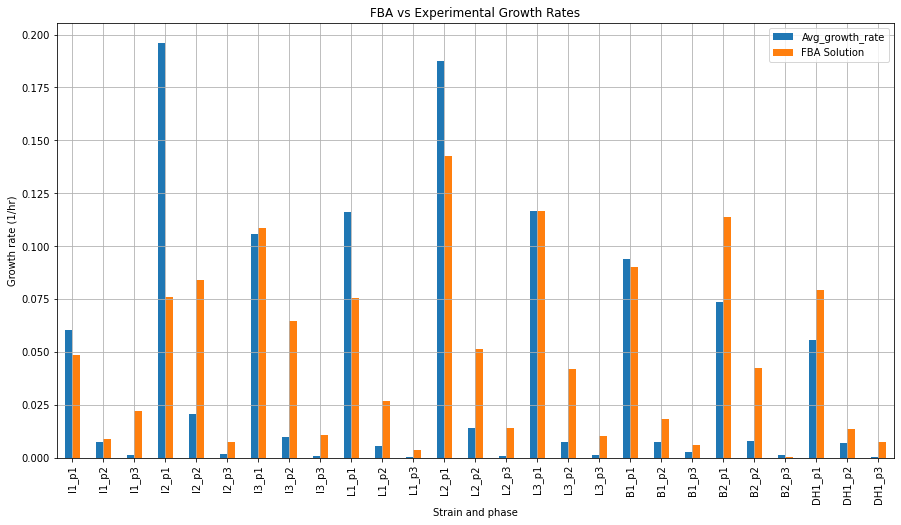

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

name_graph = 'FBA vs Experimental Growth Rates' 
df = DF_FBA_results.set_index(['Strain/phase'])

ax = df[['Avg_growth_rate','FBA Solution']].plot(kind='bar', stacked=False,
                                           title = 'FBA vs Experimental Growth Rates',
                                            figsize=(15,8))
ax.set_xlabel("Strain and phase")
ax.set_ylabel("Growth rate (1/hr)")
plt.grid()
plt.show()

Note that although the numbers aren't equal to the measured values, the grwoth pattern is similar. The growth rate for p1 is greater than p2 which is greater than p3.

Below is another form of the dataframe that organizes the data by the "strain/phase" column.

In [32]:
DF_FBA_results.set_index(['Strain/phase'])

,Strain,Phase_in_hours,FBA Solution,Avg_growth_rate,Avg_glc_flux
Strain/phase,,,,,
I1_p1,I1,0 to 6,4.861e-02,6.037e-02,-1.794
I1_p2,I1,8 to 20,8.762e-03,7.150e-03,-0.250
I1_p3,I1,24 to 48,2.197e-02,1.270e-03,-0.195
I2_p1,I2,0 to 6,7.596e-02,1.958e-01,-2.379
I2_p2,I2,8 to 20,8.411e-02,2.048e-02,-0.984
I2_p3,I2,24 to 48,7.144e-03,1.787e-03,-0.128
I3_p1,I3,0 to 6,1.086e-01,1.059e-01,-1.803
I3_p2,I3,8 to 20,6.450e-02,9.839e-03,-0.818
I3_p3,I3,24 to 48,1.050e-02,8.421e-04,-0.139


In [33]:
DF_flux_all_strains

,reaction,flux,strain,phase
0,EX_cm_e,0.000e+00,I1,0 to 6
1,EX_cmp_e,0.000e+00,I1,0 to 6
2,EX_co2_e,5.943e-01,I1,0 to 6
3,EX_cobalt2_e,-1.215e-06,I1,0 to 6
4,DM_4crsol_c,1.084e-05,I1,0 to 6
...,...,...,...,...
70870,EX_frdp_e,0.000e+00,DH1,24 to 48
70871,EX_ggdp_e,0.000e+00,DH1,24 to 48
70872,EX_4c2me_e,6.047e-05,DH1,24 to 48
70873,EX_bis_e,0.000e+00,DH1,24 to 48


## Bioproduction of biofuels by phase

### Isopentenol Production

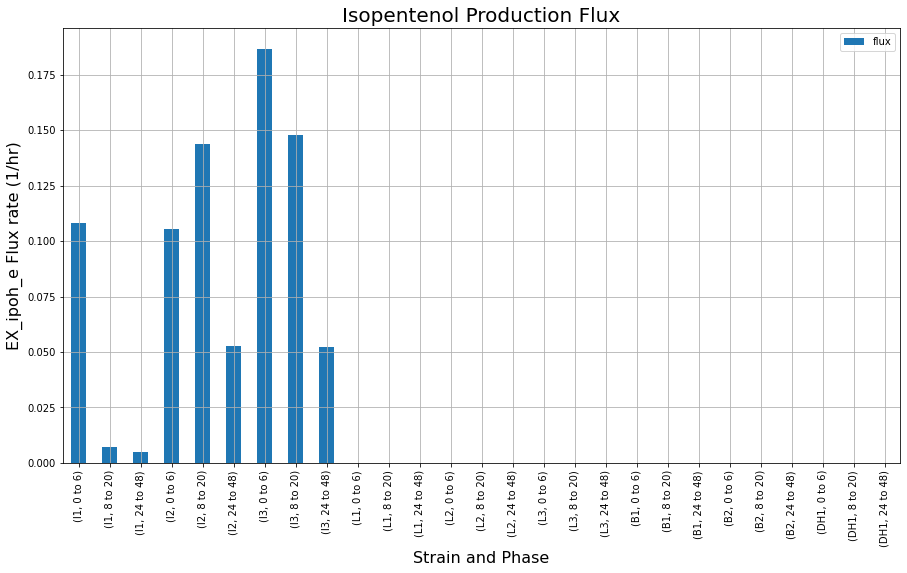

In [34]:
react = 'EX_ipoh_e'
df = DF_flux_all_strains[DF_flux_all_strains.strain.isin(['DH1','I1','I2','I3','L1','L2','L3','B1','B2'])][DF_flux_all_strains.reaction == react].set_index(['strain','phase'])

ax = df[['flux']].plot(kind='bar', stacked=False, figsize=(15,8))
ax.set_ylabel("EX_ipoh_e Flux rate (1/hr)", fontsize=16) 
ax.set_xlabel("Strain and Phase", fontsize=16)
ax.set_title('Isopentenol Production Flux', fontsize=20)
plt.grid()
plt.show()

Note that strain I3 has the highest production.

### Limonene Production

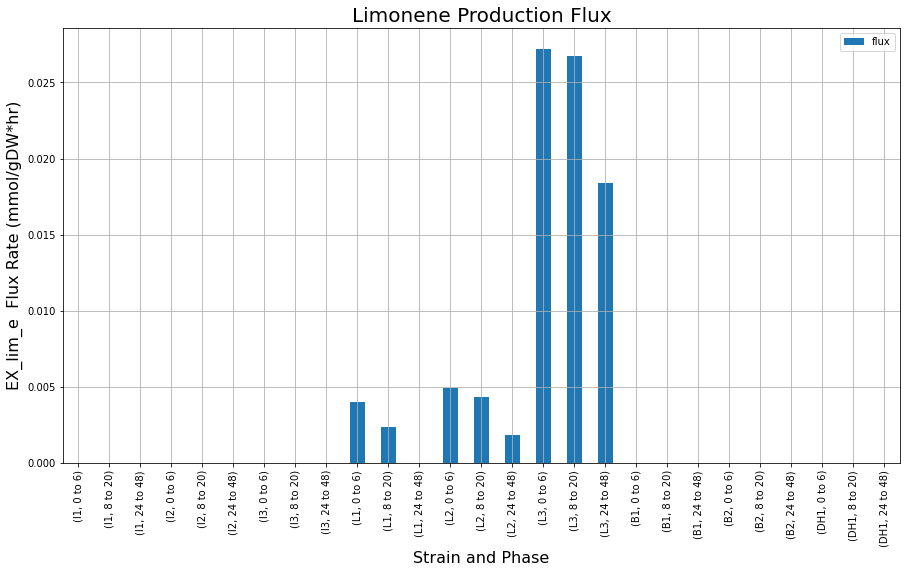

In [35]:
react = 'EX_lim_e'
df = DF_flux_all_strains[DF_flux_all_strains.strain.isin(['DH1','I1','I2','I3','L1','L2','L3','B1','B2'])][DF_flux_all_strains.reaction == react].set_index(['strain','phase'])

ax = df[['flux']].plot(kind='bar', stacked=False, figsize=(15,8))
ax.set_ylabel("EX_lim_e  Flux Rate (mmol/gDW*hr)", fontsize=16) 
ax.set_xlabel("Strain and Phase", fontsize=16)
ax.set_title('Limonene Production Flux', fontsize=20)
plt.grid()
plt.show()

Note that strain I3 has the highest production.

### Bisabolene Production

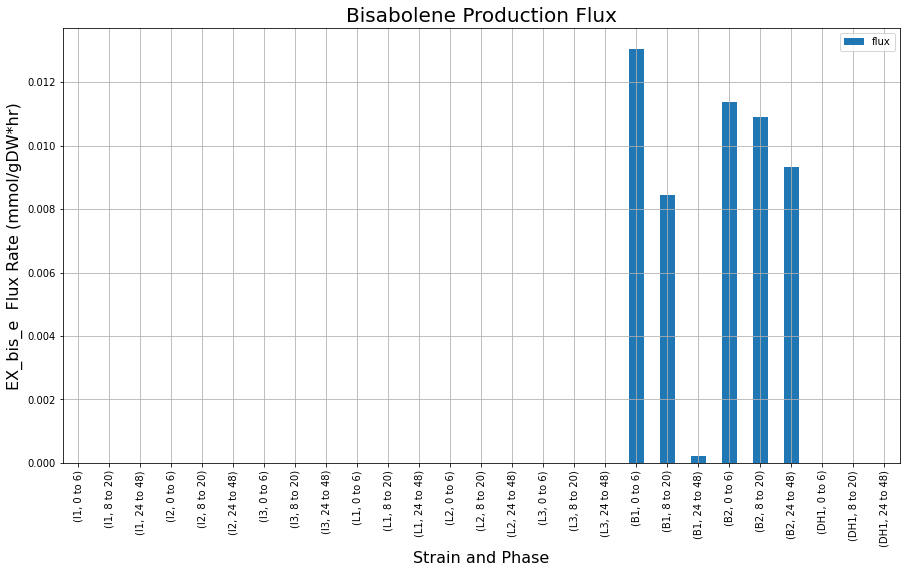

In [36]:
react = 'EX_bis_e'
df = DF_flux_all_strains[DF_flux_all_strains.strain.isin(['DH1','I1','I2','I3','L1','L2','L3','B1','B2'])][DF_flux_all_strains.reaction == react].set_index(['strain','phase'])

ax = df[['flux']].plot(kind='bar', stacked=False, figsize=(15,8))
ax.set_ylabel("EX_bis_e  Flux Rate (mmol/gDW*hr)", fontsize=16) 
ax.set_xlabel("Strain and Phase", fontsize=16)
ax.set_title('Bisabolene Production Flux', fontsize=20)
plt.grid()
plt.show()

Again, strain I3 has the highest production.

## Plotting individual flux values for the different strains and phases

### Glucose uptake

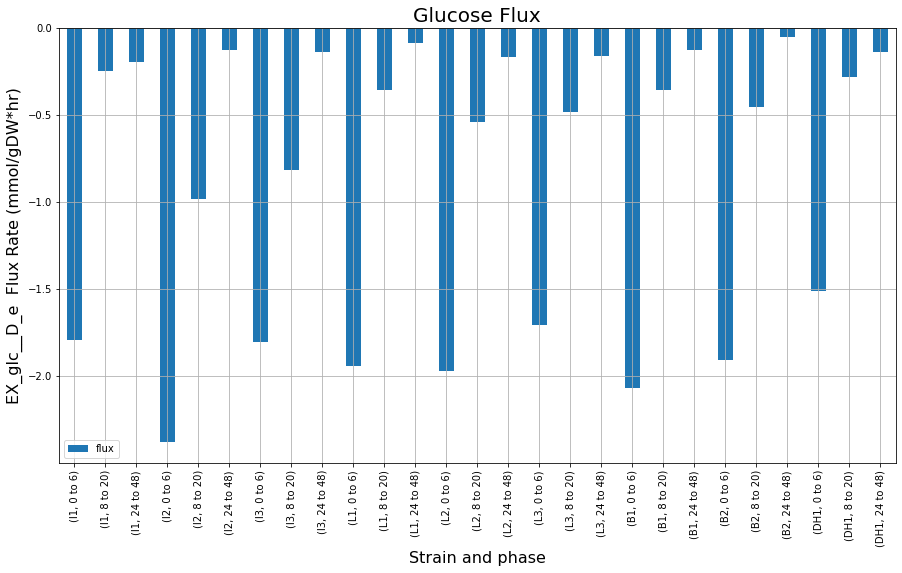

In [37]:
react = 'EX_glc__D_e'
df = DF_flux_all_strains[DF_flux_all_strains.strain.isin(['DH1','I1','I2','I3','L1','L2','L3','B1','B2'])][DF_flux_all_strains.reaction == react].set_index(['strain','phase'])

ax = df[['flux']].plot(kind='bar', stacked=False, figsize=(15,8))
ax.set_ylabel("EX_glc__D_e  Flux Rate (mmol/gDW*hr)", fontsize=16) 
ax.set_xlabel("Strain and phase", fontsize=16)
ax.set_title('Glucose Flux', fontsize=20)
plt.grid()
plt.show()

### Oxygen uptake

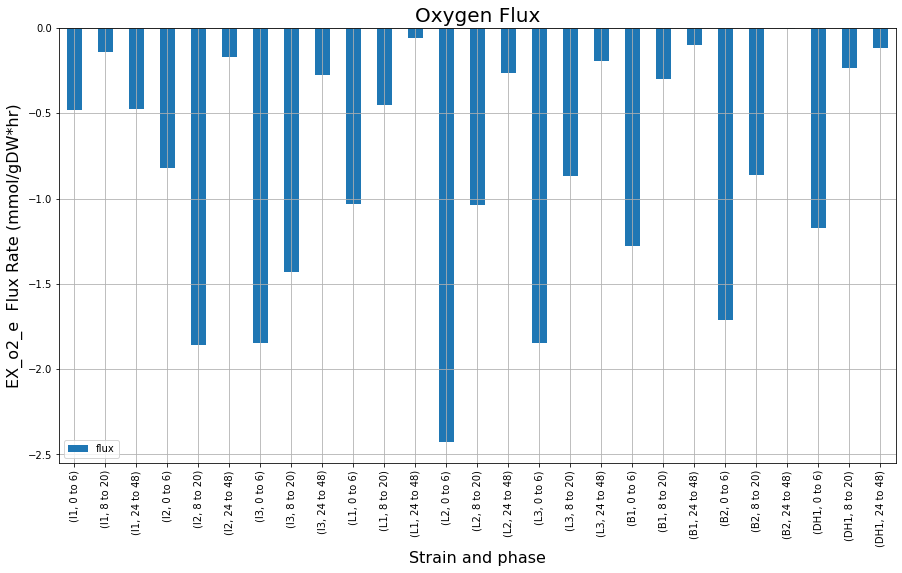

In [38]:
react = 'EX_o2_e'
df = DF_flux_all_strains[DF_flux_all_strains.strain.isin(['DH1','I1','I2','I3','L1','L2','L3','B1','B2'])][DF_flux_all_strains.reaction == react].set_index(['strain','phase'])

ax = df[['flux']].plot(kind='bar', stacked=False, figsize=(15,8))
ax.set_ylabel("EX_o2_e  Flux Rate (mmol/gDW*hr)", fontsize=16) 
ax.set_xlabel("Strain and phase", fontsize=16)
ax.set_title('Oxygen Flux', fontsize=20)
plt.grid()
plt.show()

### Fermentation flux values

Plot the flux values of the fermentation biproducts.

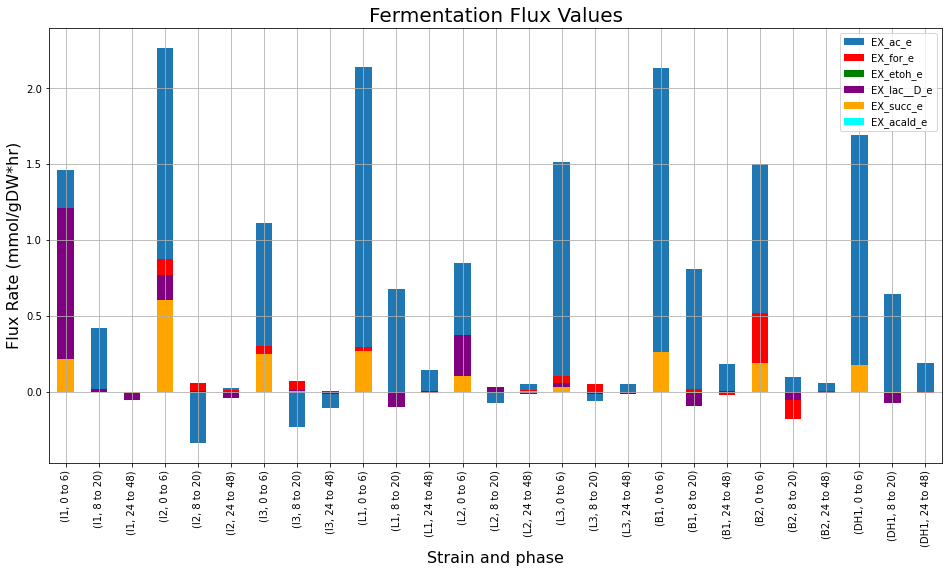

In [39]:
react = 'EX_ac_e'
react1 = 'EX_for_e'
react2 = 'EX_etoh_e'
react3 = 'EX_lac__D_e'
react4 = 'EX_succ_e'
react5 = 'EX_acald_e'

df = DF_flux_all_strains[DF_flux_all_strains.strain.isin(['DH1','I1','I2','I3','L1','L2','L3','B1','B2'])][DF_flux_all_strains.reaction == react].set_index(['strain','phase'])
df1 = DF_flux_all_strains[DF_flux_all_strains.strain.isin(['DH1','I1','I2','I3','L1','L2','L3','B1','B2'])][DF_flux_all_strains.reaction == react1].set_index(['strain','phase'])
df2 = DF_flux_all_strains[DF_flux_all_strains.strain.isin(['DH1','I1','I2','I3','L1','L2','L3','B1','B2'])][DF_flux_all_strains.reaction == react2].set_index(['strain','phase'])
df3 = DF_flux_all_strains[DF_flux_all_strains.strain.isin(['DH1','I1','I2','I3','L1','L2','L3','B1','B2'])][DF_flux_all_strains.reaction == react3].set_index(['strain','phase'])
df4 = DF_flux_all_strains[DF_flux_all_strains.strain.isin(['DH1','I1','I2','I3','L1','L2','L3','B1','B2'])][DF_flux_all_strains.reaction == react4].set_index(['strain','phase'])
df5 = DF_flux_all_strains[DF_flux_all_strains.strain.isin(['DH1','I1','I2','I3','L1','L2','L3','B1','B2'])][DF_flux_all_strains.reaction == react5].set_index(['strain','phase'])

plt.figure(figsize=(16,8))

df['flux'].plot(kind='bar',label = 'EX_ac_e')
df1['flux'].plot(kind='bar',label = 'EX_for_e',color = 'red')
df2['flux'].plot(kind='bar',label = 'EX_etoh_e',color = 'green')
df3['flux'].plot(kind='bar',label = 'EX_lac__D_e',color = 'purple')
df4['flux'].plot(kind='bar',label = 'EX_succ_e',color = 'orange')
df5['flux'].plot(kind='bar',label = 'EX_acald_e',color = 'cyan')

plt.ylabel("Flux Rate (mmol/gDW*hr)", fontsize=16) 
plt.xlabel("Strain and phase", fontsize=16)
plt.title('Fermentation Flux Values', fontsize=20)

plt.grid()
plt.legend()
plt.show()

Note that the dominant fermentation product is acetate. Notice that it's, and the other fermentation biproducts, largest values are during the first six hours of any strain which corresponds to the time period for the largest growth rate and the largest biofuel production.

## Escher Models of Isopentenol Production 

### Model I3_p1

In [40]:
m_I3_p1.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.0005655,0,0.00%
cl_e,EX_cl_e,0.0005655,0,0.00%
cobalt2_e,EX_cobalt2_e,2.716E-06,0,0.00%
cu2_e,EX_cu2_e,7.702E-05,0,0.00%
fe2_e,EX_fe2_e,0.001745,0,0.00%
glc__D_e,EX_glc__D_e,1.803,6,94.95%
k_e,EX_k_e,0.02121,0,0.00%
mg2_e,EX_mg2_e,0.0009424,0,0.00%
mn2_e,EX_mn2_e,7.507E-05,0,0.00%
mobd_e,EX_mobd_e,1.401E-05,0,0.00%


Oxygen is not the limiting factor since 1.845 mmol/gDW_hr was taken into the cell but the lower bound is -1000

###  Escher map of  model I3_p1

In [41]:
import escher
from escher import Builder
builder = Builder()
builder.model_json = 'iJO1366_mevalonate_pathways.json'
builder.map_json = 'iJO1366_mevalonate_pathways_map.json'
builder

Builder()

In [42]:
solution_m_I3_p1 = m_I3_p1.optimize()
builder.reaction_data = solution_m_I3_p1.fluxes

### Model I3_p3

In [43]:
m = model.copy();
m = adjust_model_reactions(m, 'aerobic');
[I3_fluxdict_p3, m_I3_p3, I3_biomass_p3,I3data] = set_fluxes_by_phase(I3_data, phase3, m,'I3');

exchange reactions constrained by phenotypic data:
 
 ['glc__D_e', 'pyr_e', 'succ_e', 'lac__D_e', 'for_e', 'ac_e', 'ipoh_e', 'bis_e', 'lim_e', 'ip_e', '2mecdp_e', 'mev_R_e', 'dxyl5p_e', '5pmev_e', 'h2mb4p_e', 'grdp_e', 'frdp_e', 'ggdp_e', '4c2me_e', 'EX_lim_e'] 



Solution: 
 0.010501400038620353 

Expected average biomass: 
 0.0008421131371131998


In [44]:
m_I3_p3.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
4c2me_e,EX_4c2me_e,9.551E-06,14,0.01%
ac_e,EX_ac_e,0.1058,2,18.99%
ca2_e,EX_ca2_e,5.466E-05,0,0.00%
cl_e,EX_cl_e,5.466E-05,0,0.00%
cobalt2_e,EX_cobalt2_e,2.625E-07,0,0.00%
cu2_e,EX_cu2_e,7.445E-06,0,0.00%
fe2_e,EX_fe2_e,0.0001687,0,0.00%
glc__D_e,EX_glc__D_e,0.139,6,74.79%
grdp_e,EX_grdp_e,0.0001617,10,0.15%
ip_e,EX_ip_e,0.0009898,5,0.44%


In [45]:
import escher
from escher import Builder
builder2 = Builder()
builder2.model_json = 'iJO1366_mevalonate_pathways.json'
builder2.map_json = 'iJO1366_mevalonate_pathways_map.json'
builder2

Builder()

In [46]:
solution_m_I3_p3 = m_I3_p3.optimize()
builder2.reaction_data = solution_m_I3_p3.fluxes

### Difference between I3 phase 3 and I3 phase 1

In [47]:
builder3 = Builder()
builder3.model_json = 'iJO1366_mevalonate_pathways.json'
builder3.map_json = 'iJO1366_mevalonate_pathways_map.json'
builder3

Builder()

In [48]:
builder3.reaction_data = solution_m_I3_p3.fluxes - solution_m_I3_p1.fluxes

## References

1. Brunk, Elizabeth, et al. "Characterizing strain variation in engineered *E. coli* using a multi-omics-based workflow." Cell systems 2.5 (2016): 335-346.